In [7]:
import os
import csv
import numpy as np
from sklearn import model_selection
from sklearn import metrics
# from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
import pickle
import matplotlib.pyplot as plt

In [8]:
code_path = os.getcwd()
input_dir = os.path.join(code_path,'radarScenes_v4_Nmin')
print(input_dir)

/home/user/deng/catkin_deng/src/track/DBSCAN_Train/radarScenes_v4_Nmin


In [21]:
def csv_read():
  print("Reading directory:",input_dir)
  files = os.listdir(input_dir)
  files.sort(key=lambda x:x[:11])
  print('Training Sequence:',len(files))
  Nmin = []
  TrainX = []
  for filename in files:
    csv_path = os.path.join(input_dir,filename)
    with open(csv_path,newline='') as csv_file:
      rows = csv.reader(csv_file)
      first = True
      for row in rows:
        if first:
          first = False
          continue
        if str(row).find('nan') != -1 or str(row).find('inf') != -1:
          continue
        Nmin.append(int(row[3]))
        input_row = []
        input_row.append(float(row[4])/int(row[11])) # vel slot 0
        input_row.append(float(row[5])/int(row[11])) # vel slot 1
        input_row.append(float(row[6])/int(row[11])) # vel slot 2
        input_row.append(float(row[7])/int(row[11])) # vel slot 3
        input_row.append(float(row[8])/int(row[11])) # vel slot 4
        input_row.append(float(row[9])/int(row[11])) # vel slot 5
        input_row.append(int(row[11])) # current scan num

        TrainX.append(input_row)
  NminMatrix = np.asarray(Nmin)
  NminMatrix.reshape(len(Nmin),1)
  # Nmin_min = np.min(NminMatrix)
  # Nmin_max = np.max(NminMatrix)
  # NminMatrix = (NminMatrix-Nmin_min)/(Nmin_max-Nmin_min)
  print('Target:',NminMatrix[0])
  print('Input:',TrainX[0])
  TrainMatrix = np.asarray(TrainX)
  X_train, X_test, Y_train, Y_test = model_selection.train_test_split(np.array(TrainMatrix), np.array(NminMatrix), test_size=0.2)
  print('Training Element: vel slot 0~5, current scan num; Training Target: Nmin in iou 0.3')
  return X_train, X_test, Y_train, Y_test

In [22]:
X_train, X_test, Y_train, Y_test = csv_read()

Reading directory: /home/user/deng/catkin_deng/src/track/DBSCAN_Train/radarScenes_v4_Nmin
Training Sequence: 126
Target: 2
Input: [0.9707792207792207, 0.02922077922077922, 0.0, 0.0, 0.0, 0.0, 308]
Training Element: vel slot 0~5, current scan num; Training Target: Nmin in iou 0.3


In [11]:
def save_model(model,name):
    out_path = os.path.join(code_path,name+'.sav')
    pickle.dump(model,open(out_path,'wb'))

In [12]:
def evaluate_model(model,X_test,Y_test):
    predict_y_test = model.predict(X_test)
    print('Test r-score: ',metrics.r2_score(Y_test,predict_y_test))
    print('Test mean: ',metrics.mean_squared_error(Y_test,predict_y_test))
    print(Y_test)
    print(predict_y_test)

In [13]:
def load_model(name):
    load_path = os.path.join(code_path,name+'.sav')
    return pickle.load(open(load_path, 'rb'))

In [23]:
training_model_name = 'Nmin_MLP_model_logistic_v2'

In [24]:
print('Training Net'+training_model_name+'!')
model = MLPRegressor(hidden_layer_sizes=200, max_iter=300, activation='logistic')
model.fit(X_train,Y_train)
save_model(model, training_model_name)

Training NetNmin_MLP_model_logistic_v2!


{'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 200, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 300, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Test r-score:  0.16884936668216288
Test mean:  3.3851617948244392
[ 2  2  2 ... 10  4  3]
[2.99927827 2.69331276 1.6487162  ... 4.8718645  4.56176007 5.24271691]


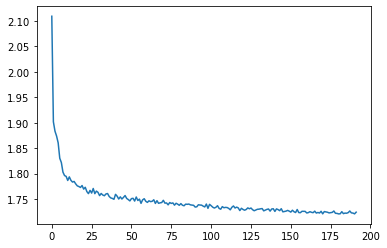

In [25]:
print(model.get_params())
evaluate_model(model,X_test,Y_test)
plt.plot(model.loss_curve_)

In [28]:
for i in range(50):
    model.partial_fit(X_train,Y_train)
    print('End training iter',i)
    save_model(model,training_model_name)

End training iter 0
End training iter 1
End training iter 2
End training iter 3
End training iter 4
End training iter 5
End training iter 6
End training iter 7
End training iter 8
End training iter 9
End training iter 10
End training iter 11
End training iter 12
End training iter 13
End training iter 14
End training iter 15
End training iter 16
End training iter 17
End training iter 18
End training iter 19
End training iter 20
End training iter 21
End training iter 22
End training iter 23
End training iter 24
End training iter 25
End training iter 26
End training iter 27
End training iter 28
End training iter 29
End training iter 30
End training iter 31
End training iter 32
End training iter 33
End training iter 34
End training iter 35
End training iter 36
End training iter 37
End training iter 38
End training iter 39
End training iter 40
End training iter 41
End training iter 42
End training iter 43
End training iter 44
End training iter 45
End training iter 46
End training iter 47
En

{'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 200, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 300, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Test r-score:  0.15313370016352856
Test mean:  3.4491695351142053
[ 2  2  2 ... 10  4  3]
[2.64425012 2.57326129 1.54050294 ... 4.48377998 4.23683189 5.10668562]


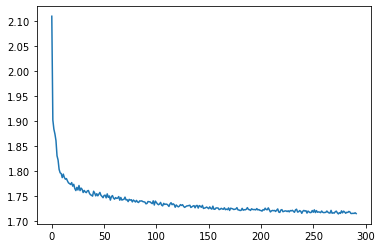

In [29]:
#v2 result
print(model.get_params())
evaluate_model(model,X_test,Y_test)
plt.plot(model.loss_curve_)

{'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 200, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 300, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Test r-score:  0.1369326667846824
Test mean:  3.5082262181754733
[2 6 2 ... 2 2 2]
[2.84016375 3.80515353 2.84016375 ... 2.84016375 2.84016375 2.84016375]


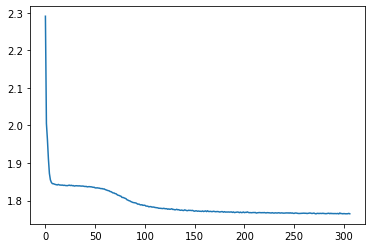

In [20]:
# v1 result
print(model.get_params())
evaluate_model(model,X_test,Y_test)
plt.plot(model.loss_curve_)

In [38]:
intercepts = np.array(model.intercepts_)
print(intercepts.shape)
print(repr(intercepts[0]))
print(repr(intercepts[1]))

(2,)
array([-0.76456197, -0.76910707, -0.60640359,  0.2181038 ,  0.60559777,
       -0.13083175, -0.25951904, -1.85104163, -0.83012058, -2.22527811,
       -2.01647501, -0.49906892, -0.7936567 ,  1.21285886, -0.89838216,
       -1.82953637, -0.62160227, -1.97381083,  0.48292831, -0.17686145,
        1.32115119,  1.1257761 , -1.22445328, -0.77437319, -1.72092766,
       -0.12052337,  0.30467247, -0.36834985, -1.90696882, -1.51786699,
       -1.03144964,  0.17745702,  1.29362687,  0.72452269,  0.97522031,
        1.19461594, -1.12220093, -0.99396187,  3.17965477, -0.79756656,
       -0.81720437,  0.83820678, -0.12076942,  1.25255681, -1.95775582,
       -0.90154319,  2.43688285, -1.95665228, -1.79248904,  1.04475554,
       -1.9028403 ,  1.42295505,  1.39685864,  1.2797425 ,  0.93968937,
       -2.09127623, -0.79552418, -0.93340533,  1.24481117,  0.38474847,
        1.30211174, -0.22189331,  2.07313944,  0.1001179 ,  1.35348648,
        0.79668357, -0.33688442, -0.89257791, -1.75569063, 

In [34]:
coef = np.array(model.coefs_)
print(coef[0].shape)
print(coef[1].shape)
print(repr(coef[1].reshape(200)))
# print(model.coefs_)
for i in range(7):
    print(repr(coef[0][i]))


(7, 200)
(200, 1)
array([-0.02594449, -0.02592618,  0.07949869,  0.02852915,  0.07633746,
       -0.04673546,  0.04031614, -0.0393478 , -0.02563667, -0.01563827,
       -0.03591181, -0.02906958, -0.02583485, -0.10181086, -0.02502062,
       -0.0389725 , -0.02725483, -0.03741561,  0.01850116, -0.04329384,
       -0.07588854, -0.09361058, -0.02181382, -0.02607008, -0.01712632,
        0.20120017, -0.06733901,  0.07076742, -0.03901434, -0.01897883,
       -0.02368002,  0.25072083, -0.04867729,  0.04951603,  0.01290076,
       -0.06870157, -0.02278616, -0.02401114, -1.14157214, -0.02581932,
       -0.02572076,  0.02640372,  0.056107  , -0.07811507, -0.03787781,
       -0.02498964, -0.19435857, -0.03790889, -0.03661257, -0.07258792,
       -0.0390755 , -0.10024473, -0.04861789, -0.08560471, -0.07096686,
       -0.03290077, -0.02582698, -0.02467419, -0.11038369,  0.24171485,
       -0.10238235, -0.03870527, -0.04719133,  0.07613589, -0.08142146,
       -0.06684843,  0.07630563, -0.02507728, 

In [42]:
from sklearn.linear_model import LinearRegression
training_model_name_2 = 'Nmin_Linear_model_v1'
model2 = LinearRegression().fit(X_train, Y_train)
save_model(model2,training_model_name_2)

In [43]:
print(model2.get_params())
evaluate_model(model2,X_test,Y_test)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
Test r-score:  0.14015508114401287
Test mean:  3.5020296587708097
[ 2  2  2 ... 10  4  3]
[3.0210202  2.76326802 2.56258954 ... 5.3454705  4.45465787 4.88882664]


In [46]:
linear_coef = model2.coef_
print(repr(linear_coef))
print(repr(model2.intercept_))

array([-6.89332385e+00,  1.64223469e+01,  1.86527774e+00, -1.25485051e+00,
       -1.48365888e+01,  4.69713853e+00,  1.84108700e-03])
9.185273596135618
